In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import ghibtools as gh
import matplotlib.pyplot as plt

In [155]:
N = 10 # Nombre de participants dont les données sont simulées sur la base de celles du premier participant acquis

valeur_baseline = 60.2 # Valeur mesurée en baseline chez le premier participant
valeur_odor = 80.6 # Valeur mesurée en condition odeur chez le premier participant
valeur_music = 74.9 # Valeur mesurée en condition musique chez le premier participant

sd_estimée_baseline = 5.1 # Valeur calculée en baseline chez le premier participant
sd_estimée_odor = 7.5 # Valeur calculée en condition odeur chez le premier participant
sd_estimée_music = 6.4 # Valeur calculée en condition musique chez le premier participant

In [2]:
save_folder = '../Analyses/Figures_Maelys/'

In [156]:
participants = []
for i in range(1 ,N + 1):
    if i < 10:
        participants.append(f'P0{i}')
    else:
        participants.append(f'P{i}')

In [157]:
label_metric = 'RMSSD'
label_condition = 'Stimulation'

In [158]:
conditions = ['Baseline','Odor','Music']

In [159]:
mu = {'Baseline':valeur_baseline, 'Odor':valeur_odor,'Music':valeur_music}
sd = {'Baseline':sd_estimée_baseline, 'Odor':sd_estimée_odor,'Music':sd_estimée_music}

In [160]:
concat = []
for condition in conditions:
    data = np.random.randn(N) * sd[condition] + mu[condition]
    df_stim = pd.DataFrame(columns = ['subject',label_condition,label_metric])
    df_stim[label_metric] = data
    df_stim[label_condition] = condition
    df_stim['subject'] = participants
    concat.append(df_stim)
df = pd.concat(concat)

In [161]:
df

,subject,Stimulation,RMSSD
0,P01,Baseline,65.554860
1,P02,Baseline,64.931639
2,P03,Baseline,66.982410
3,P04,Baseline,62.189872
4,P05,Baseline,57.135991
5,P06,Baseline,50.325741
6,P07,Baseline,66.176748
7,P08,Baseline,61.393709
8,P09,Baseline,65.246230
9,P10,Baseline,61.457021


/mnt/autofs/cmo/users/ValentinGhibaudo/ghibtools/ghibtools/stats.py:383: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estimators = pd.concat([df.groupby(predictor).mean()[outcome].reset_index(), df.groupby(predictor).std()[outcome].reset_index()[outcome].rename('sd')], axis = 1).round(2).set_index(predictor)
/mnt/autofs/cmo/users/ValentinGhibaudo/ghibtools/ghibtools/stats.py:383: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estimators = pd.concat([df.groupby(predictor).mean()[outcome].reset_index(), df.groupby(predictor).std()[outcome].reset_index()[outcome].rename('sd')], axis = 1).round(2).set_index(pred

Text(47.097222222222214, 0.5, 'RMSSD')

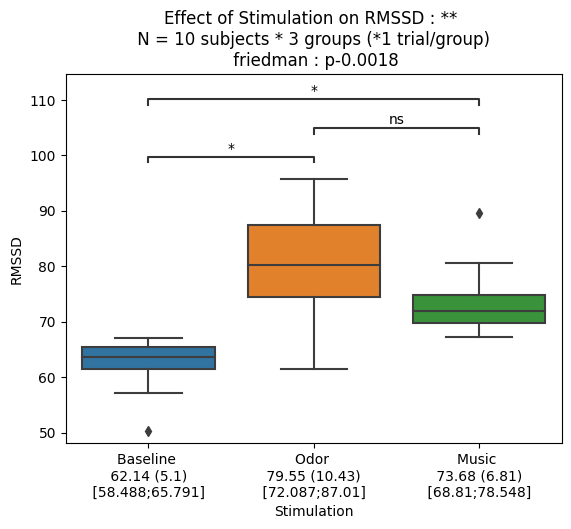

In [162]:
fig, ax = plt.subplots()
gh.auto_stats(df=df, predictor = label_condition, outcome = label_metric, design = 'within', subject = 'subject', ax=ax)
ax.set_ylabel(label_metric)
# fig.savefig(save_folder + 'conductance_cutanee2', bbox_inches = 'tight')